## 2022-09-05

## 선형 모델(Linear Models)  
- 선형 모델은 100여년 전에 개발되었고, 지난 몇십 년 동안 폭넓게 연구되고 현재도 널리 쓰임  
- 선형 모델은 입력 feature에 대한 선형 함수를 만들어 예측을 수행

### 회귀의 선형 모델  
- 회귀의 경우 선형 모델을 위한 일반적인 예측함수는 다음과 같음  
- 예측y = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b  
- x[0] 부터 x[p] 까지는 하나의 데이터 포인트에 대한 feature를 나타내며(feature의 수는 p+1)  p+1 계수
// w는 weight 가중치를 의미
- w 와 b는 모델이 학습할 파리미터  
- 그리고 예측y는 모델이 만들어낸 예측값  
- 특성(feature값)이 하나인 데이터셋이라면 식은 다음과 같음  
- 예측y = w[0] * x[0] + b  
- w[0] 는 기울기이고 b는 y축과 만나는 절편  
- feature가 많아지면 w는 각 feature에 해당하는 기울기를 모두 가짐  
- 다르게 생각하면 예측값은 입력 feature에 w의 각 가중치(음수도 가능)를 곱해서 더한 가중치 합으로 볼 수 있음
- 1차원 wave 데이터셋으로 파라미터 w[0]와 b를 직선처럼 되도록 학습시켜 보자

w[0]: 0.393906  b: -0.031804


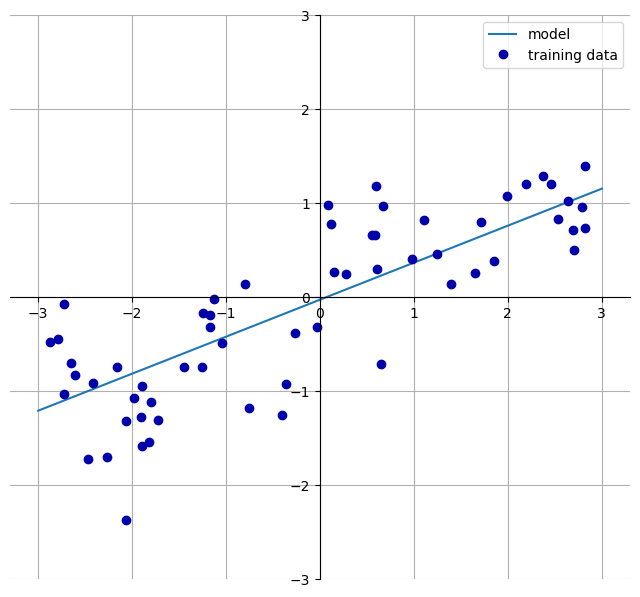

In [3]:
import mglearn
mglearn.plots.plot_linear_regression_wave()
#1차원으로 만든 그래프

- 회귀를 위한 선형 모델은 feature가 하나일 땐 직선, 두 개일 땐 평면이 되며, 더 높은 차원에서는 초평면(hyperplane)이 되는 회귀 모델의 특징을 가짐 

- 이 직선과 KNeighborsRegression을 사용하여 만든 이전 그림의 선과 비교해 보면 직선을 사용한 예측이 더 제약이 많아 보임  
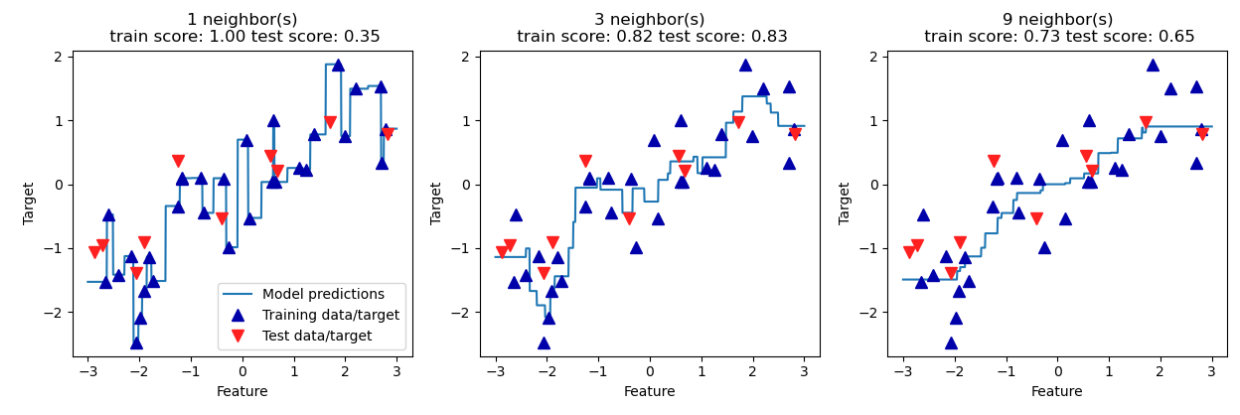
- 즉 데이터의 상세 정보를 모두 잃어버린 것처럼 보임(어느 정도 사실)  
- target y가 feature들의 선형 조합이라는 것은 매우 과한(때론 비현식적인) 가정임  
- 하지만 1차원 데이터셋만 놓고 봐서 생긴 편견일 수 있음  
- feature가 많은 데이터셋이라면 선형 모델은 매우 훌륭한 성능을 낼 수 있음  
- 회귀를 위한 선형 모델은 다양하게 존재, 이 모델들은 훈련 데이터로부터 모델 파라미터 w와 b를 학습하는 방법과 모델의 복잡도를 제어하는 방법에서 차이가 남


### 선형 회귀(최소제곱법) : Ordinary least squares  
- 선형 회귀(linear regression) 또는 최소제곱법(ordinary least squares)은 가장 간단하고 오래된 회귀용 선형 알고리즘  
- 선형 회귀는 예측과 훈련 세트에 있는 target y 사이의 평균제곱오차(mean squared error)를 최소화하는 파리미터 w와 b를 찾음  
- 평균제곱오차는 예측값과 target 값의 차이를 제곱하여 더한 후에 샘플의 수로 나눈 것  
- 선형 회귀는 추가 매개변수가 없는 것이 장점이지만, 모델의 복잡도를 제어할 방법도 없음

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

- 기울기 파리미터 w는 가중치(weight) 또는 계수(coefficient) 라고 하며 lr 객체의 coef_ 속성에 저장되어 있고 편향(bias) 또는 절편(intercept) 파라미터 b는 intercept_ 속성에 저장되어 있음

In [6]:
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [7]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


- R<sup>2</sup> 값이 0.66 인 것은 그리 좋은 결과가 아님  
- 하지만 훈련 세트와 테스트 세트의 점수가 매우 비슷, 즉 과대적합이 아니라 과소적합인 상태를 의미  
- 1차원 데이터셋에서는 모델이 매우 단순하므로 과대적합을 걱정할 필요가 없음  
- 그러나, feature 가 많은 고차원 데이터셋에서는 선형 모델의 성능이 매우 높아져서 과대적합될 가능성이 높음  
- LinearRegression 모델이 보스턴 주택가격 데이터셋 같은 복잡한 데이터셋에서 어떻게 동작하는지 확인해보자  
- 이 데이터셋에는 샘플이 506개, feature는 확장된 것을 포함해 104개

In [8]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

C:\Users\BIT\miniconda3\envs\py38-env2\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hous

In [9]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


- 이런 성능의 차이는 모델이 과대적합되었다는 확실한 신호이므로 복잡도를 제어할 수 있는 모델을 사용해야 함  
- 기본 선형 회귀 방식 대신 가장 널리 쓰이는 모델은 리지(Ridge) 회귀임

### Ridge Regression  
- 리지도 회귀를 위한 선형 모델이므로 최소제곱법에서 사용한 것과 같은 예측 함수를 사용   
- 하지만 리지 회귀에서는 가중치 w 선택은 훈련 데이터를 잘 예측하기 위해서 뿐만 아니라 추가 제약 조건을 만족시키기 위한 목적도 있음  
- 가중치의 절대값을 가능한 한 작게 만드는 것, 즉 w의 모든 원소가 0에 가깝게 되길 원함  
- 이는 모든 feature가 출력에 주는 영향을 최소한으로 만듬(기울기를 작게 만듬)  
- 이런 제약을 규제(Regularization)라 함  
- 규제란 과대적합이 되지 않도록 모델을 강제로 제한한다는 의미  
- 리지 회귀에 사용하는 규제 방식을 L2 규제라 함  
- 리지 회귀는 linear_model.Ridge에 구현되어 있음

In [10]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)

print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


- 훈련 세트의 점수는 LinearRegression 보다 낮지만 테스트 세트에 대한 점수는 더 높음  
- 모델의 복잡도가 낮아지면 훈련 세트의 성능은 나빠지지만 더 일반화된 모델이 됨  
- Ridge 는 모델을 단순하게 해주고 훈련 세트에 대한 성능 사이를  절충할 수 있는 방법을 제공함  
- 사용자는 alpha 매개변수로 훈련 세트의 성능 대비 모델을 얼마나 단순화할 지를 지정  
- 앞의 예제에서는 기본값인 alpha=1.0 을 사용  
- 최적의 alpha 값은 사용하는 데이터셋에 의존적임  
- alpha 값을 높이면(규제를 더 강하게 -> 절댓값을 더 작게 만들어준다.) 계수를 0에 더 가깝게 만들어서 훈련 세트의 성능은 나빠지지만 일반화에 도움을 줌

In [12]:
#규제를 강화
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [13]:
#규제를 약화
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


- 이 코드에서는 alpha=0.1 이 꽤 좋은 성능을 보임  
- 테스트 세트에 대한 성능이 높아질 때까지 alpha 값을 줄일 수 있을 것임  
- alpha 값이 모델 복잡도와 어떤 관련이 있는지 살펴봄(좋은 매개변수를 선택하는 문제는 또 다른 영역)  
- 또한 alpha 값에 따라 모델의 coef_ 속성이 어떻게 달라지는지를 조사해 보면 alpha 매개변수가 모델을 어떻게 변경시키는지 더 깊게 이해할 수 있음  
- 높은 alpha 값은 제약이 더 많은 모델이므로 작은 alpha 값일 때보다 coef_ 의 절대값 크기가 작을 것이라고 예상할 수 있음

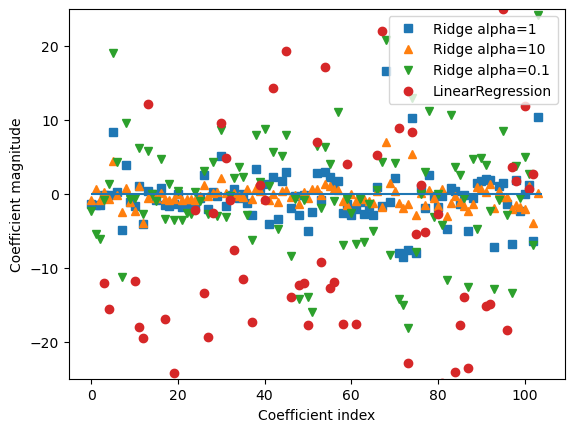

In [15]:
import matplotlib.pyplot as plt

plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1") 
# 0.1 퍼져있는 걸로 제약을 가함.

plt.plot(lr.coef_, 'o', label="LinearRegression")

plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()
plt.show()

 다음은 보스턴 주택가격 데이터셋에서 여러 가지 크기로 샘플링하여 LinearRegression과 Ridge(alpha=1)을 적용한 것임  
- 이렇게 데이터셋의 크기에 따른 모델의 성능 변화를 나타낸 그래프를 학습 곡선(Learning curve) 라고 함

C:\Users\BIT\miniconda3\envs\py38-env2\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hous

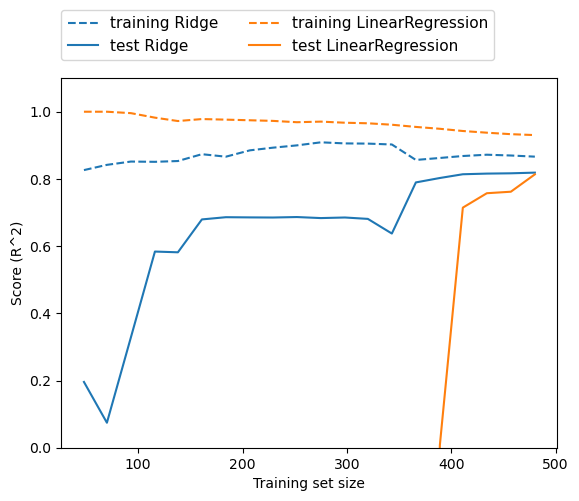

In [17]:
mglearn.plots.plot_ridge_n_samples()

- 리지는 규제가 적용되므로 선형 회귀보다는 전반적으로 훈련 데이터 점수가 낮음  
- 그러나 테스트 데이터에서는 리지의 점수가 더 높음  
- 두 모델 전부 데이터가 많아질수록 성능이 향상됨  
- 데이터가 많아질수록 선형 회귀의 모델은 데이터를 기억하거나 과대적합하기가 어려워짐을 보임

- 과대적합하면 빠져나오기가 힘들다. 리지 선형회귀 모델